## Python Exercise : K-Means 1

Analyze genrated data from make_blobs
1. Set 3 main spot (random_state = 42)
2. Plot the data using scatter plot
3. Determine the optimal number of cluster based on your observation
4. Fit k-means and plot the clustering result in scatter plot.Is it 3 cluster?

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x,y = make_blobs(random_state=42)

<AxesSubplot:>

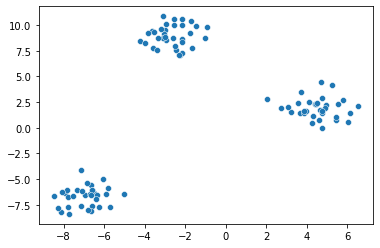

In [3]:
sns.scatterplot(x=x[:,0],y=x[:,1])

### KMeans

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [5]:
kmeans.labels_

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0])

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

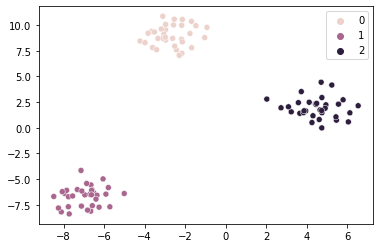

In [6]:
sns.scatterplot(x[:,0],x[:,1], hue=kmeans.labels_)

## Python Exercise : K-Means 2

Analyze data "ilustrasi k means.csv"
1. plot data using scatterplot
2. Dettermine the optimal number pf cluster
    - Elbow method
    - Silhouette method
3. Plot the data and clustering result (optimal number of cluster) using scatterplot

In [7]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
x = pd.read_csv('data/ilustrasi k means.csv', sep=';')
x


,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


### EDA

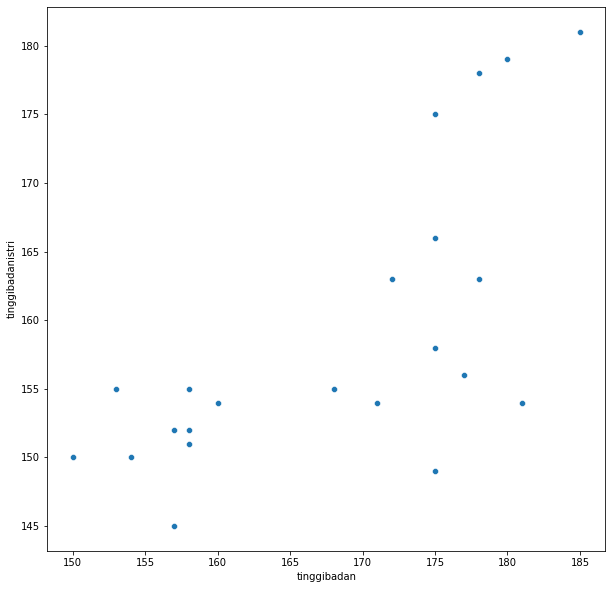

In [9]:

plt.figure(figsize=(10,10))

# sns.set_context(context= 'notebook',font_scale= 2)
sns.scatterplot(
    x='tinggibadan', 
    y='tinggibadanistri',
    data=x
)
plt.xlabel="TinggiBadan"
plt.ylabel = "TinggiBadanIstri"
plt.show()

### Elbow Method

In [10]:
def cluster_evaluation(number_of_cluster):
  # clustering variation
    clusterings = [KMeans(n_clusters=k).fit(x) for k in number_of_cluster]
    centroids = [k.cluster_centers_ for k in clusterings]

  # within sumsq
    D_k = [cdist(x, cent, 'euclidean') for cent in centroids] 
    cIdx = [np.argmin(D, axis=1) for D in D_k] 
    dist = [np.min(D, axis=1) for D in D_k] 
    avgWithinSS = [sum(d)/x.shape[0] for d in dist] 
    
    return avgWithinSS

**Within SUm Square**
1. Semakin banyak cluster, maka withn sq semakin kecil, semakin kecil sq semakin seragam
2. Perubahan within sum square akan digunakan.

In [11]:
number_of_cluster = range(2,11)
avgWithinsq = cluster_evaluation(number_of_cluster)
avgWithinsq

[7.94444507217375,
 4.54826669767587,
 3.8489700212083027,
 3.402047769311638,
 2.997729662132332,
 2.6858837483387887,
 2.375931966432781,
 2.05084750294275,
 1.8066016654872916]

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

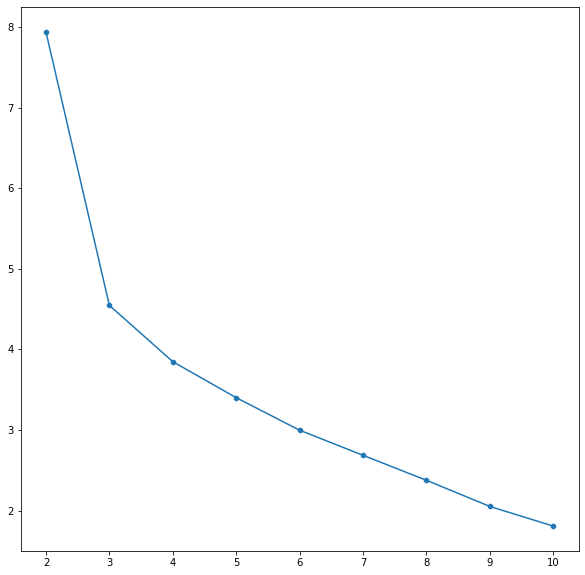

In [12]:
plt.figure(figsize=(10,10))
sns.lineplot(number_of_cluster,avgWithinsq)
sns.scatterplot(number_of_cluster,avgWithinsq)


1. Penurunan dari 2 ke 3 significant
2. Penurunan dari 3 ke 4 tidak terlalu significant 
3. Jumlah cluster yg diambil adalah 3

### Silhouette

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans()

In [22]:
label = kmeans.labels_
silhouette_score(x, label, metric='euclidean')

0.35588320142578017

In [23]:
score = []
n_clust = range(2,11)
for i in n_clust:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    
    label = kmeans.labels_
    score.append(silhouette_score(x,label,metric='euclidean'))

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

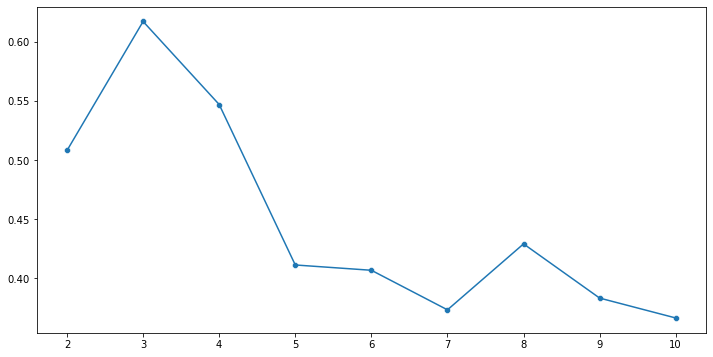

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(n_clust,score)
sns.scatterplot(n_clust,score)

1. Semakin tinggi semakin baik untuk silhouette
2. Jumlah cluster maksimal adalah 3

### Final Result

In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [32]:
x['Cluster'] = kmeans.labels_

In [33]:
x

,tinggibadan,tinggibadanistri,Cluster
0,175,175,2
1,178,178,2
2,175,166,0
3,180,179,2
4,185,181,2
5,178,163,0
6,175,158,0
7,181,154,0
8,168,155,0
9,171,154,0


C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tinggibadan', ylabel='tinggibadanistri'>

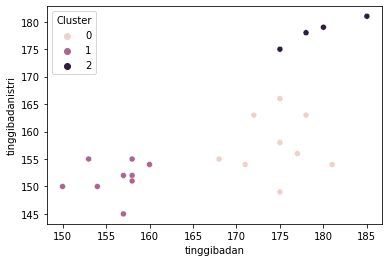

In [34]:
sns.scatterplot(x['tinggibadan'],x['tinggibadanistri'], hue=x['Cluster'])